In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("diabetesyapılacak.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB
None


In [3]:
y=df.Outcome.values
x_data=df.drop(["Outcome"],axis=1)#Outcome drop yapılarak veri seti üzerinde mlp çalışması yapılması sağlandı.

In [4]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [5]:
from sklearn.model_selection import train_test_split #2000 entrylik veri setinin 1600 tanesi eğitim 400 taneside test için ayrıldı.
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (1600, 8)
y_train: (1600,)
x_test: (400, 8)
y_test: (400,)


In [6]:
from sklearn.neural_network import MLPClassifier

mlpc=MLPClassifier(random_state=1)
mlpc.fit(x_train,y_train)

C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=1)

Normalde output kısmında diğer parametreleride vermesi gerekiyordu örneğin : relu,epsilon,solver vb galiba yeni sürüm old.için bu değerleri göstermedi.

In [7]:
print("mlpc score:",mlpc.score(x_test,y_test))

mlpc score: 0.7725


In [10]:
mlpc_2=MLPClassifier(random_state=1,solver="lbfgs",activation="logistic",hidden_layer_sizes=(3,5))
mlpc_2.fit(x_train,y_train)
print("mlpc_2 score:",mlpc_2.score(x_test,y_test))

mlpc_2 score: 0.77


C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#  K-fold cross validation

In [11]:
import numpy as np
import pandas as pd

In [12]:
df=pd.read_csv("diabetesyapılacak.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB
None


In [13]:
y=df.Outcome.values
x_data=df.drop(["Outcome"],axis=1).values

In [14]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)) 

In [15]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

scores=[]

kf=KFold(n_splits=10,random_state=1)
mlpc=MLPClassifier(solver="lbfgs",activation="logistic",hidden_layer_sizes=(3,5))

for train_indexler,test_indexler in kf.split(x):
    mlpc.fit(x[train_indexler],y[train_indexler])
    score=mlpc.score(x[test_indexler],y[test_indexler])
    scores.append(score)
    print(score)
    
print("ortalama score:",np.mean(scores))

C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.77


C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.74


C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.82
0.62


C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.805


C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.81


C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.775


C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.695


C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.79
0.745
ortalama score: 0.757


C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.765
0.745
0.78
0.765
0.805
0.825
0.77
0.7
0.79
0.79
ortalama score: 0.7735
Sürekli hata aldığımdan dolayı Daha düzenli gözükmesi için bu şekilde belirttim.


# Grid search

In [16]:
df=pd.read_csv("diabetesyapılacak.csv")

In [17]:
y=df.Outcome.values
x_data=df.drop(["Outcome"],axis=1)

In [18]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values#drop edilen OUTCOME ayarlamalar yapıldı.

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [20]:
 from sklearn.model_selection import GridSearchCV

mlpc_params={"alpha":[0.1,0.01,0.001,0.0001],
            "hidden_layer_sizes":[(10,10),(3,3,3),(100,100),(3,5,3)],
            "solver":["lbfgs","adam","sgd"]}

mlpc=MLPClassifier(activation="logistic",random_state=1)

mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  2.3min finished
C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [21]:
print(mlpc_cv_model.best_params_)# en iyi parametreler bu kodla manuele gerek kalmadan belirlenmiş oldu.

{'alpha': 0.001, 'hidden_layer_sizes': (10, 10), 'solver': 'lbfgs'}


In [22]:
mlpc_tuned=MLPClassifier(alpha=0.01,hidden_layer_sizes=(100,100),solver="adam").fit(x_train,y_train)
print("score:",mlpc_tuned.score(x_test,y_test))

score: 0.83


Burada da hata verdi fakat SCORE belirlenmiş oldu.

# Model değerlendirmesi

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

df=pd.read_csv("diabetesyapılacak.csv")

In [24]:
y=df.Outcome.values
x_data=df.drop(["Outcome"],axis=1)

In [25]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [27]:
mlpc=MLPClassifier(alpha=0.001,hidden_layer_sizes=(4,7),solver="lbfgs",activation="logistic",max_iter=500).fit(x_train,y_train)

In [28]:
import sklearn.metrics as metrics

y_pred=mlpc.predict(x_test)

In [29]:
acc=metrics.accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 0.775


In [30]:
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[227  42]
 [ 48  83]]


In [31]:
f1=metrics.f1_score(y_test,y_pred)
print("f1 score:",f1)

f1 score: 0.6484375


In [32]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       269
           1       0.66      0.63      0.65       131

    accuracy                           0.78       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.77      0.78      0.77       400



In [33]:
#roc and auc
probs=mlpc.predict_proba(x_test)
#print(probs)
probs=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,probs)
auc_value=metrics.auc(fpr,tpr)

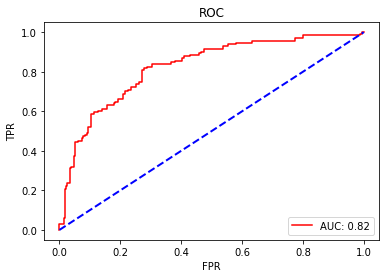

In [34]:
plt.title("ROC")
plt.plot(fpr,tpr,label="AUC: "+str(round(auc_value,2)),color="red")
plt.plot([0,1],[0,1],color="blue",lw=2,linestyle="--")
plt.legend(loc="lower right")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

Hocam uğraştım ama bu hatayı gideremedim.

# Seaborn 

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [36]:
 df=pd.read_csv("diabetesyapılacak.csv")
print(df.info())
df.Outcome=[0 if each ==1 else 1 if each==2 else 2 for each in df.Outcome]
y=df.Outcome
x_data=df.drop(["Outcome"],axis=1)
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB
None


In [37]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [38]:
mlpc=MLPClassifier(activation="relu",solver="adam",max_iter=1000,hidden_layer_sizes=(50,50,50))
mlpc.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=1000)

In [39]:
y_pred=mlpc.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(acc)

0.9225


In [40]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       131
           2       0.95      0.94      0.94       269

    accuracy                           0.92       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.92      0.92      0.92       400



In [41]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[117  14]
 [ 17 252]]


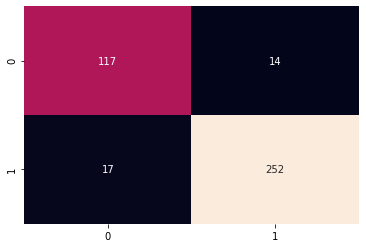

In [42]:
sns.heatmap(cm,cbar=False,annot=True,fmt="")

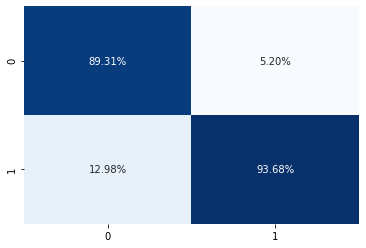

In [43]:
class_adlari=["0","1"]
sns.heatmap(cm/cm.sum(axis=1), annot=True, cbar=False, cmap="Blues",xticklabels=class_adlari,yticklabels=class_adlari,fmt=".2%")

# keras

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D,MaxPool2D,BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [71]:
 df=pd.read_csv("diabetesyapılacak.csv")

In [72]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [73]:
model=Sequential()
model.add(Dense(300,activation="relu",input_dim=8))


model.add(Dense(100,activation="relu"))

model.add(Dense(1,activation="sigmoid"))

In [80]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [81]:
egitim=model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
50/50 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/20
50/50 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/20
50/50 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/20
50/50 [==============================] - 0s 2ms/step 

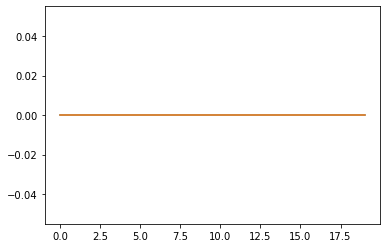

In [69]:
plt.plot(egitim.history["accuracy"])
plt.plot(egitim.history["val_accuracy"])
plt.show()

In [68]:
 import sklearn.metrics as metrics

y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)
cm=metrics.confusion_matrix(y_true,y_pred)
print(cm)

ValueError: `axis` must be fewer than the number of dimensions (1)